In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score



In [79]:
df=pd.read_csv("C:/Users/singh/Codes/ass/tips.csv")
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [80]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [81]:
df.duplicated().sum()

np.int64(1)

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [84]:
categorical_columns=['sex','smoker','day','time','size']
numerical_columns=['total_bill','tip']

<Axes: xlabel='total_bill', ylabel='tip'>

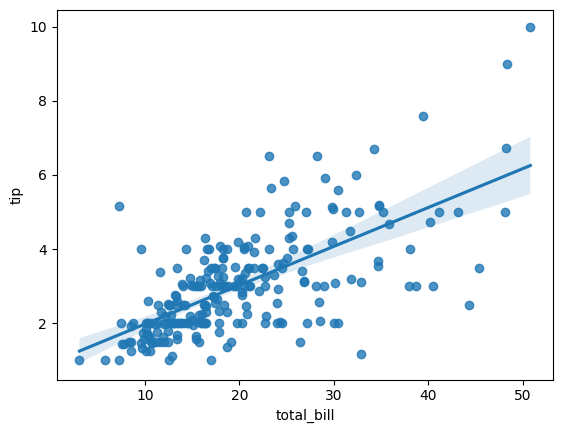

In [86]:
sns.regplot(x='total_bill',y='tip',data=df)

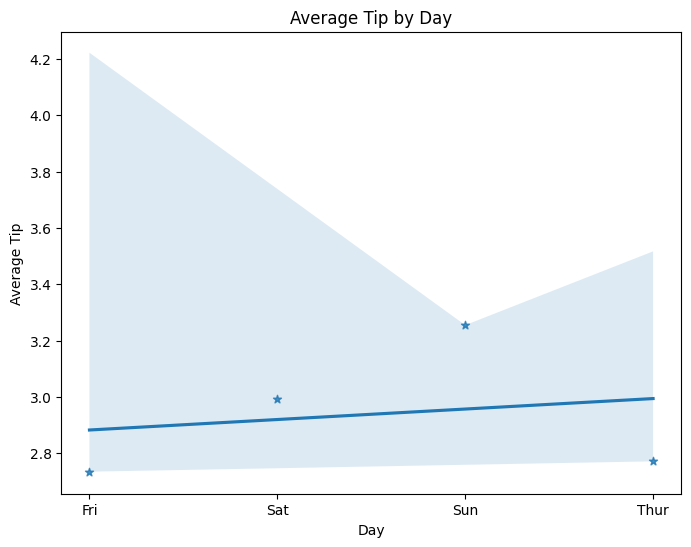

In [87]:
# Convert 'day' to category codes if regression plot is necessary
avg_tip_by_day['day_num'] = avg_tip_by_day['day'].astype('category').cat.codes

plt.figure(figsize=(8, 6))
sns.regplot(x='day_num', y='tip', data=avg_tip_by_day, marker='*')
plt.xticks(avg_tip_by_day['day_num'], avg_tip_by_day['day'])  # Replace numeric x-ticks with original labels
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()


<Axes: xlabel='sex', ylabel='count'>

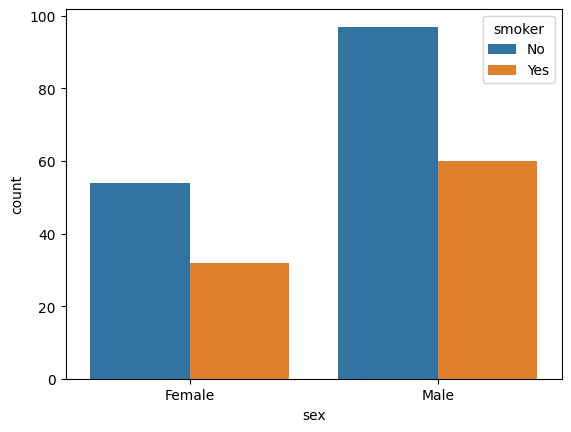

In [88]:
sns.countplot(x='sex',data=df,hue='smoker')

<Axes: xlabel='day', ylabel='count'>

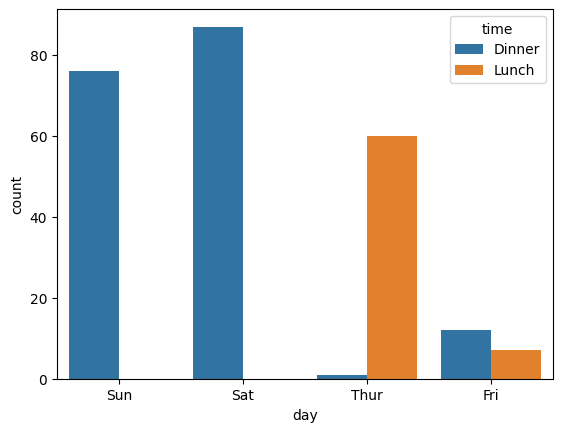

In [89]:
sns.countplot(x='day',data=df,hue='time')

# On weekends, people tend to prefer having dinner instead of lunch, while on weekdays, they usually opt for lunch.

<Axes: xlabel='size', ylabel='count'>

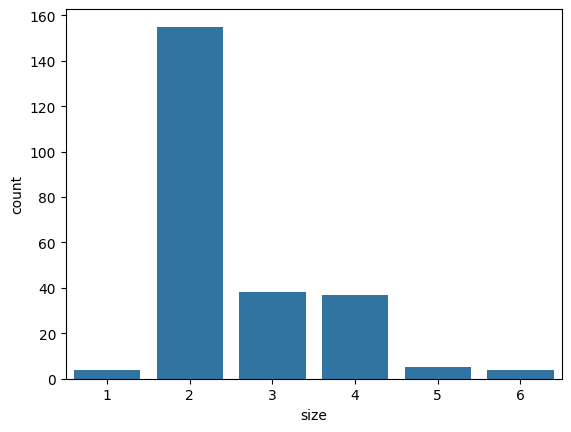

In [90]:
sns.countplot(x='size',data=df)

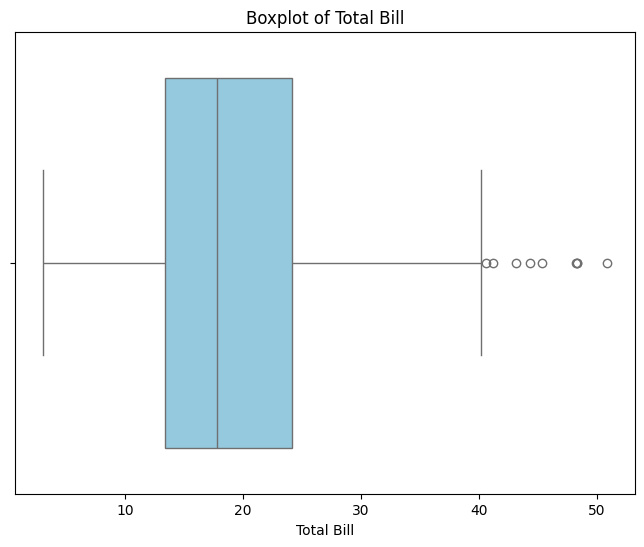

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["total_bill"], color="skyblue")
plt.title("Boxplot of Total Bill")
plt.xlabel("Total Bill")
plt.show()


<Axes: xlabel='total_bill', ylabel='Density'>

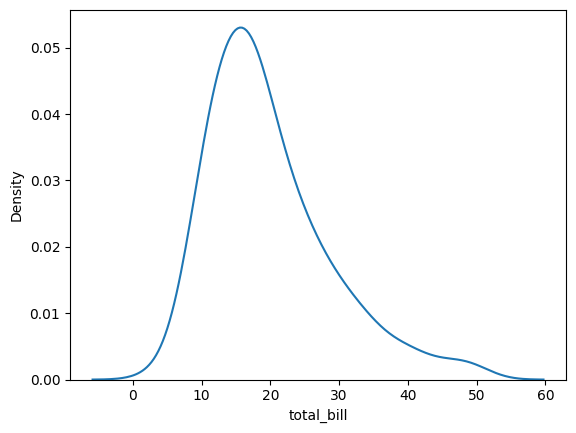

In [92]:
sns.kdeplot(df['total_bill'])

## Total bill is normally distributed


<Axes: xlabel='tip', ylabel='Density'>

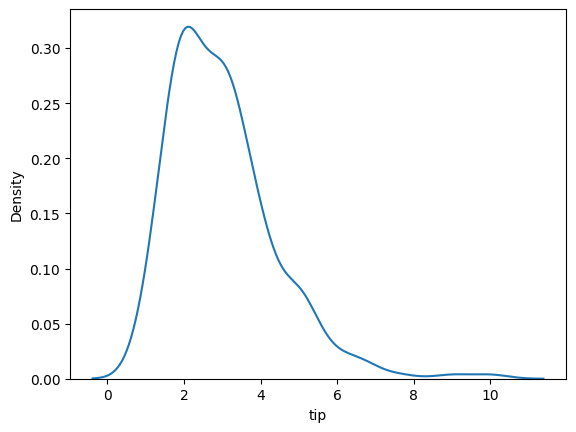

In [93]:
sns.kdeplot(df['tip'])

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in categorical_columns:
  df[x]=le.fit_transform(df[x])

<Axes: >

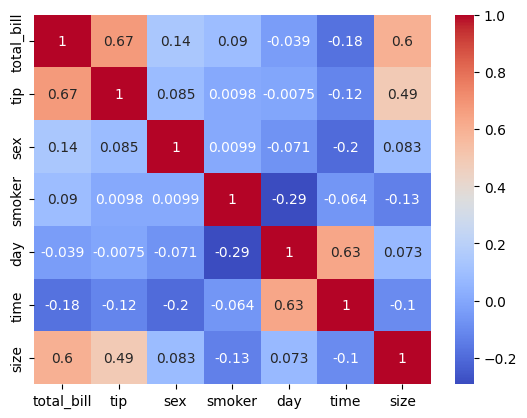

In [95]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')


## Tip is strongly related to total_bill and size

In [96]:
import pandas as pd
from scipy import stats
for col in categorical_columns:
    groups = [df['tip'][df[col] == category] for category in df[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)

    print(f'ANOVA test for {col}:')
    print(f'F-Statistic: {f_stat}, p-value: {p_value}')


    if p_value < 0.05:
        print(f"Result: There is a significant difference in tip based on '{col}'\n")
    else:
        print(f"Result: No significant difference in tip based on '{col}'\n")


ANOVA test for sex:
F-Statistic: 1.7653045322427956, p-value: 0.1852209123133871
Result: No significant difference in tip based on 'sex'

ANOVA test for smoker:
F-Statistic: 0.022972209770162684, p-value: 0.8796561596490358
Result: No significant difference in tip based on 'smoker'

ANOVA test for day:
F-Statistic: 1.5983175744380123, p-value: 0.19044935091812132
Result: No significant difference in tip based on 'day'

ANOVA test for time:
F-Statistic: 3.379502389943741, p-value: 0.06724262150368775
Result: No significant difference in tip based on 'time'

ANOVA test for size:
F-Statistic: 15.605995227530164, p-value: 2.8449097701910894e-13
Result: There is a significant difference in tip based on 'size'



In [97]:
X=df[['total_bill','size']]
y=df['tip']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(r2_score(y_test,lr.predict(X_test)))

0.5217749320928373


In [101]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print(r2_score(y_test,lasso.predict(X_test)))

0.5267075224145781


In [102]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
print(r2_score(y_test,ridge.predict(X_test)))

0.5217929091492411


In [103]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(r2_score(y_test,rf.predict(X_test)))

0.4068048699581317


In [104]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print(f'R² Score with Best Hyperparameters: {r2_score(y_test, y_pred)}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
R² Score with Best Hyperparameters: 0.4407256345846744


In [105]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
print(r2_score(y_test,svr.predict(X_test)))

0.4227172658902121


In [106]:
import optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-2, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
    model = SVR(C=C, kernel=kernel, gamma=gamma, epsilon=epsilon)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f'Best Hyperparameters: {study.best_params}')
print(f'Best R² Score: {study.best_value}')


[I 2024-11-10 22:49:11,931] A new study created in memory with name: no-name-a5fc8dfc-e82f-46d0-b33e-5b144ca067e3
C:\Users\singh\AppData\Local\Temp\ipykernel_18044\4092483303.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-2, 1e2)
C:\Users\singh\AppData\Local\Temp\ipykernel_18044\4092483303.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  epsilon = trial.suggest_uniform('epsilon', 0.01, 0.5)
[I 2024-11-10 22:49:11,937] Trial 0 finished with value: 0.39315941855366154 and parameters: {'C': 0.3444303833605987, 'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.31930436230836257}. Best is trial 0 with value: 0.39315941855366154.
C:\Users\singh\AppDat

Best Hyperparameters: {'C': 0.049674663957600264, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.0441494493024954}
Best R² Score: 0.546750252285426


SVR
Best Hyperparameters: {'C': 0.049674663957600264, 'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.0441494493024954}
Best R² Score: 0.546750252285426

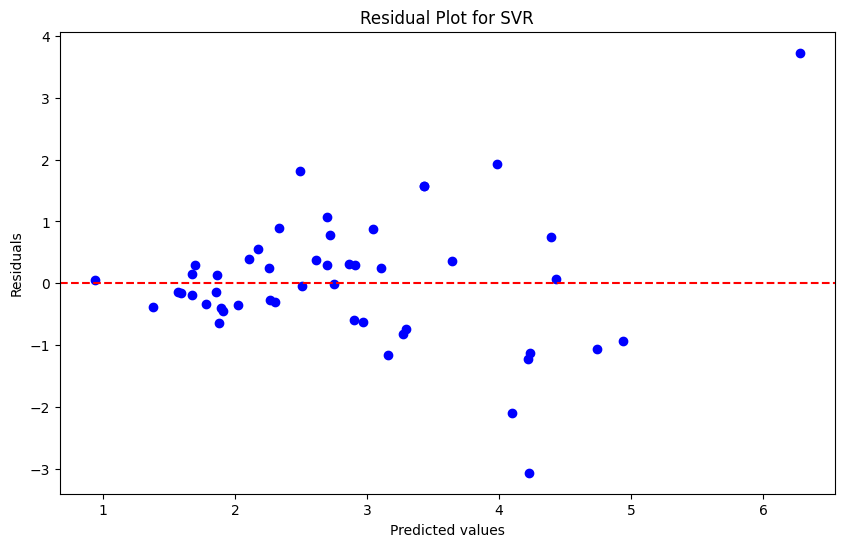

In [107]:
best_model = SVR(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.show()


In [108]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
print(r2_score(y_test,knn.predict(X_test)))

0.345433972505121


In [109]:
def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev'])
    p = trial.suggest_int('p', 1, 2)
    model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, metric=metric, p=p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best hyperparameters: {study.best_params}")
print(f"Best R² score: {study.best_value}")

[I 2024-11-10 22:49:12,756] A new study created in memory with name: no-name-9993c643-c17e-4038-b2be-52e6ca4c3221
[I 2024-11-10 22:49:12,761] Trial 0 finished with value: 0.38010432596336297 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}. Best is trial 0 with value: 0.38010432596336297.
[I 2024-11-10 22:49:12,766] Trial 1 finished with value: 0.39571776539741155 and parameters: {'n_neighbors': 43, 'weights': 'distance', 'metric': 'euclidean', 'p': 2}. Best is trial 1 with value: 0.39571776539741155.
[I 2024-11-10 22:49:12,770] Trial 2 finished with value: 0.3854720185855104 and parameters: {'n_neighbors': 50, 'weights': 'uniform', 'metric': 'manhattan', 'p': 2}. Best is trial 1 with value: 0.39571776539741155.
[I 2024-11-10 22:49:12,774] Trial 3 finished with value: 0.3942379047492257 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'chebyshev', 'p': 1}. Best is trial 1 with value: 0.39571776539741155.
[I 2024-11-10 22:49:12,

Best hyperparameters: {'n_neighbors': 27, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}
Best R² score: 0.43594279419735493


KNN
Best hyperparameters: {'n_neighbors': 27, 'weights': 'uniform', 'metric': 'euclidean', 'p': 1}
Best R² score: 0.43594279419735493

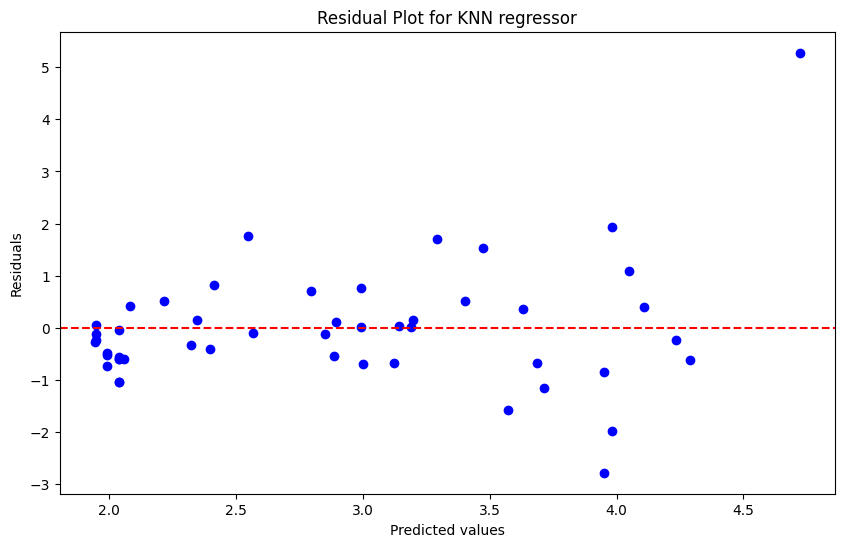

In [110]:
best_model = KNeighborsRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN regressor')
plt.show()


In [111]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(r2_score(y_test,dt.predict(X_test)))

0.007732629221115395


In [112]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best hyperparameters: {study.best_params}")
print(f"Best R² score: {study.best_value}")

[I 2024-11-10 22:49:13,497] A new study created in memory with name: no-name-5407f1e4-5d38-4b84-b1f2-6fb560681c0d
[I 2024-11-10 22:49:13,503] Trial 0 finished with value: 0.5640062380128938 and parameters: {'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 0 with value: 0.5640062380128938.
[I 2024-11-10 22:49:13,508] Trial 1 finished with value: 0.3277826516059522 and parameters: {'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 0 with value: 0.5640062380128938.
[I 2024-11-10 22:49:13,512] Trial 2 finished with value: 0.3262332865466683 and parameters: {'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.5640062380128938.
[I 2024-11-10 22:49:13,517] Trial 3 finished with value: 0.5014990740697902 and parameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 

Best hyperparameters: {'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best R² score: 0.5977762317747017


DECISION TREE REGRESSOR
Best hyperparameters: {'max_depth': 15, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best R² score: 0.5977762317747017

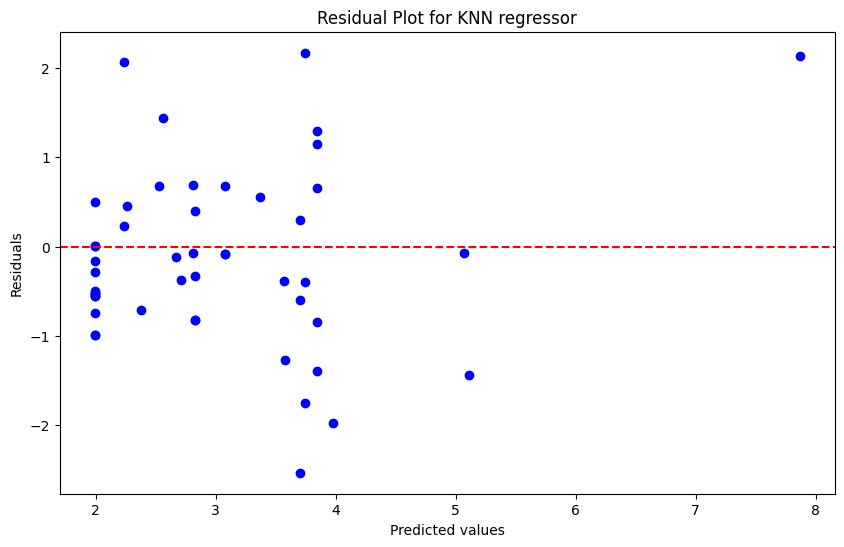

In [113]:
best_model = DecisionTreeRegressor(**study.best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN regressor')
plt.show()

## Best Regressor Model is DECSION TREE Regressor with r2 score of 0.5977762317747017

# Customer count is higher on weekdays, especially during dinner hours. Efforts should be made to manage customers effectively during this peak time.